<a href="https://colab.research.google.com/github/TyEisch/CS231AFinalProject/blob/main/FinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)
%cd drive/MyDrive/PyNotebooks/FinalData

import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt

!pip install keras
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


Mounted at /content/drive
/content/drive/MyDrive/PyNotebooks/FinalData


Start Training and Testing

Found 177 files belonging to 2 classes.
Using 142 files for training.
Found 177 files belonging to 2 classes.
Using 35 files for validation.
['neutral', 'parterre']


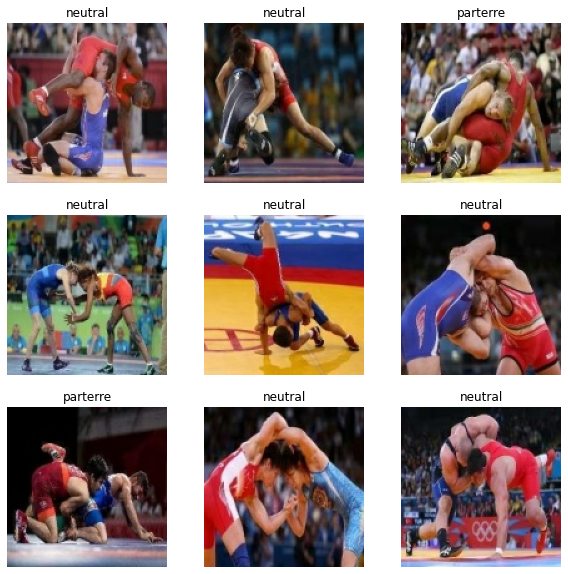

In [2]:
batch_size = 9
img_height = 128
img_width = 128

train = tf.keras.utils.image_dataset_from_directory(
  'data/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val = tf.keras.utils.image_dataset_from_directory(
  'data/',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


image_count = 177

class_names = train.class_names
print(class_names)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

Prepping Our Model

In [3]:
AUTOTUNE = tf.data.AUTOTUNE

train = train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val = val.cache().prefetch(buffer_size=AUTOTUNE)

num_classes = len(class_names)

model = Sequential([
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])


model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



Training The Model

Epoch 1/15
16/16 [==============================] - 6s 309ms/step - loss: 0.8037 - accuracy: 0.5211 - val_loss: 0.6904 - val_accuracy: 0.5714
Epoch 2/15
16/16 [==============================] - 5s 313ms/step - loss: 0.6837 - accuracy: 0.5704 - val_loss: 0.6875 - val_accuracy: 0.5143
Epoch 3/15
16/16 [==============================] - 5s 318ms/step - loss: 0.6366 - accuracy: 0.5986 - val_loss: 0.6612 - val_accuracy: 0.5429
Epoch 4/15
16/16 [==============================] - 5s 304ms/step - loss: 0.5167 - accuracy: 0.7606 - val_loss: 0.5892 - val_accuracy: 0.6857
Epoch 5/15
16/16 [==============================] - 3s 170ms/step - loss: 0.3430 - accuracy: 0.8803 - val_loss: 0.6444 - val_accuracy: 0.7429
Epoch 6/15
16/16 [==============================] - 3s 167ms/step - loss: 0.1947 - accuracy: 0.9225 - val_loss: 0.8132 - val_accuracy: 0.6286
Epoch 7/15
16/16 [==============================] - 3s 167ms/step - loss: 0.1638 - accuracy: 0.9366 - val_loss: 0.7312 - val_accuracy: 0.6000
Epoch 

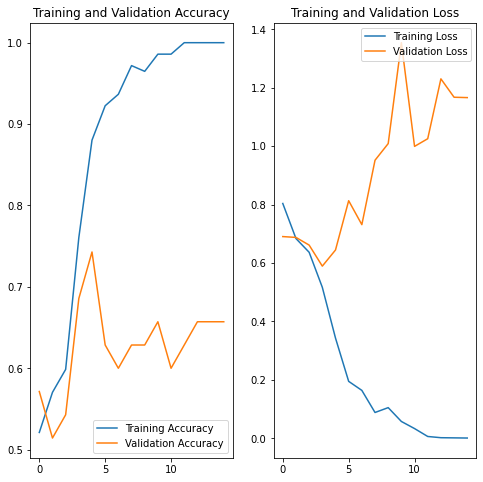

In [4]:
epochs=15
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


Testing the Model

In [5]:
test = tf.keras.utils.image_dataset_from_directory(
  'data/',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=1)

correct_count = 0
for images, labels in test:
    predictions = model.predict(images)
    score = tf.nn.softmax(predictions[0])
    pred = class_names[np.argmax(score)]
    if pred == class_names[labels[0]]:
      correct_count += 1
accuracy = correct_count / 177
print("Testing Accuracy: %.3f"%(accuracy))

Found 177 files belonging to 2 classes.
Testing Accuracy: 0.932


Worst Pre-Optimization Test Accuracy: 80.8%

Best Pre-Optimization Test Accuracy: 93.2%

Fine Tuning


Epoch 1/28
16/16 [==============================] - 6s 257ms/step - loss: 0.7369 - accuracy: 0.5352 - val_loss: 0.6812 - val_accuracy: 0.7143
Epoch 2/28
16/16 [==============================] - 3s 190ms/step - loss: 0.6791 - accuracy: 0.5845 - val_loss: 0.6750 - val_accuracy: 0.5429
Epoch 3/28
16/16 [==============================] - 3s 191ms/step - loss: 0.6477 - accuracy: 0.6056 - val_loss: 0.5819 - val_accuracy: 0.6857
Epoch 4/28
16/16 [==============================] - 3s 189ms/step - loss: 0.6173 - accuracy: 0.6690 - val_loss: 0.5082 - val_accuracy: 0.7714
Epoch 5/28
16/16 [==============================] - 3s 188ms/step - loss: 0.5923 - accuracy: 0.6690 - val_loss: 0.5238 - val_accuracy: 0.7143
Epoch 6/28
16/16 [==============================] - 3s 193ms/step - loss: 0.5419 - accuracy: 0.7183 - val_loss: 0.4786 - val_accuracy: 0.7143
Epoch 7/28
16/16 [==============================] - 3s 193ms/step - loss: 0.4586 - accuracy: 0.7958 - val_loss: 0.4753 - val_accuracy: 0.7714
Epoch 

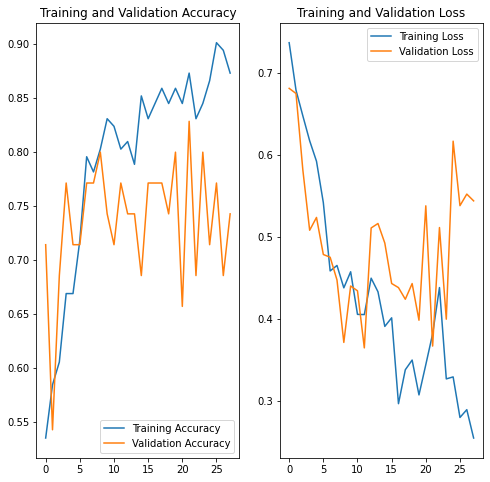

In [9]:
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

model = Sequential([
  data_augmentation,
  layers.Rescaling(1./255),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

epochs=28
history = model.fit(
  train,
  validation_data=val,
  epochs=epochs
)


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()



Testing Accuracy

In [10]:
test = tf.keras.utils.image_dataset_from_directory(
  'data/',
  seed=123,
  image_size=(img_height, img_width),
  batch_size=1)

correct_count = 0
for images, labels in test:
    predictions = model.predict(images)
    score = tf.nn.softmax(predictions[0])
    pred = class_names[np.argmax(score)]
    if pred == class_names[labels[0]]:
      correct_count += 1
accuracy = correct_count / 177
print("Testing Accuracy: %.3f"%(accuracy))

Found 177 files belonging to 2 classes.
Testing Accuracy: 0.910


Worst Post-Optimization Testing Accuracy: 78.6%

Best Post-Optimization Testing Accuracy: 91.0%